In [100]:
import pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.model_selection import train_test_split


In [101]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [102]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [103]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [105]:
df.shape

(1599, 12)

In [106]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [107]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [108]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

<AxesSubplot:ylabel='Frequency'>

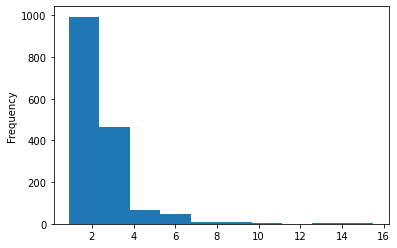

In [109]:
df['residual sugar'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

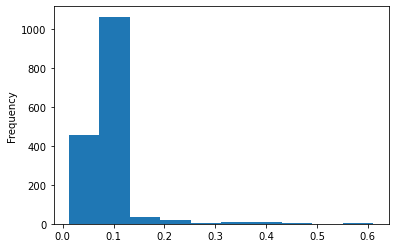

In [110]:
df['chlorides'].plot.hist()

In [111]:
df['chlorides']=np.log(df['chlorides'])

<AxesSubplot:ylabel='Frequency'>

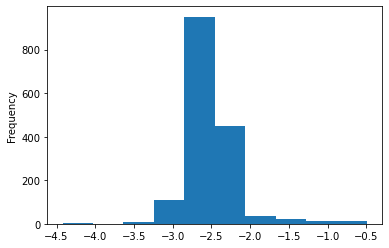

In [112]:
df['chlorides'].plot.hist()

In [113]:
df['residual sugar']=np.log(df['residual sugar'])

<AxesSubplot:ylabel='Frequency'>

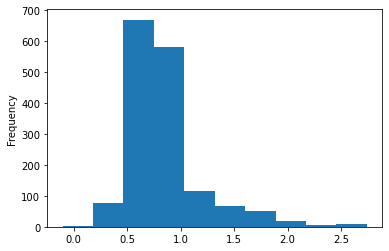

In [114]:
df['residual sugar'].plot.hist()

In [115]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          1.806864
chlorides               1.745215
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [116]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,0.850232,-2.505462,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,0.357443,0.327215,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,-0.105361,-4.422849,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,0.641854,-2.659260,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,0.788457,-2.538307,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,0.955511,-2.407946,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,2.740840,-0.492658,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [117]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.174742,0.175191,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.024278,0.108726,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.172286,0.181780,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.174742,0.024278,0.172286,1.000000,0.117102,0.150696,0.197799,0.417538,-0.091241,0.010586,0.080569,0.023533
chlorides,0.175191,0.108726,0.181780,0.117102,1.000000,-0.002195,0.058376,0.351939,-0.283629,0.278909,-0.303961,-0.176140
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.150696,-0.002195,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.197799,0.058376,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.417538,0.351939,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.091241,-0.283629,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.010586,0.278909,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

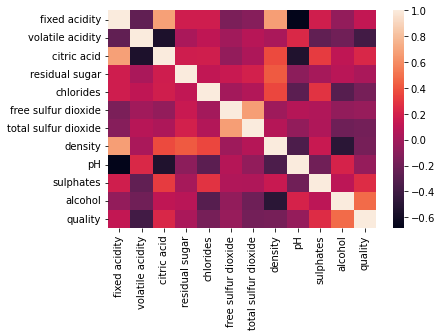

In [118]:
sns.heatmap(df.corr())

In [119]:
df.drop('volatile acidity',axis=1,inplace=True)


In [120]:
df.columns

Index(['fixed acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

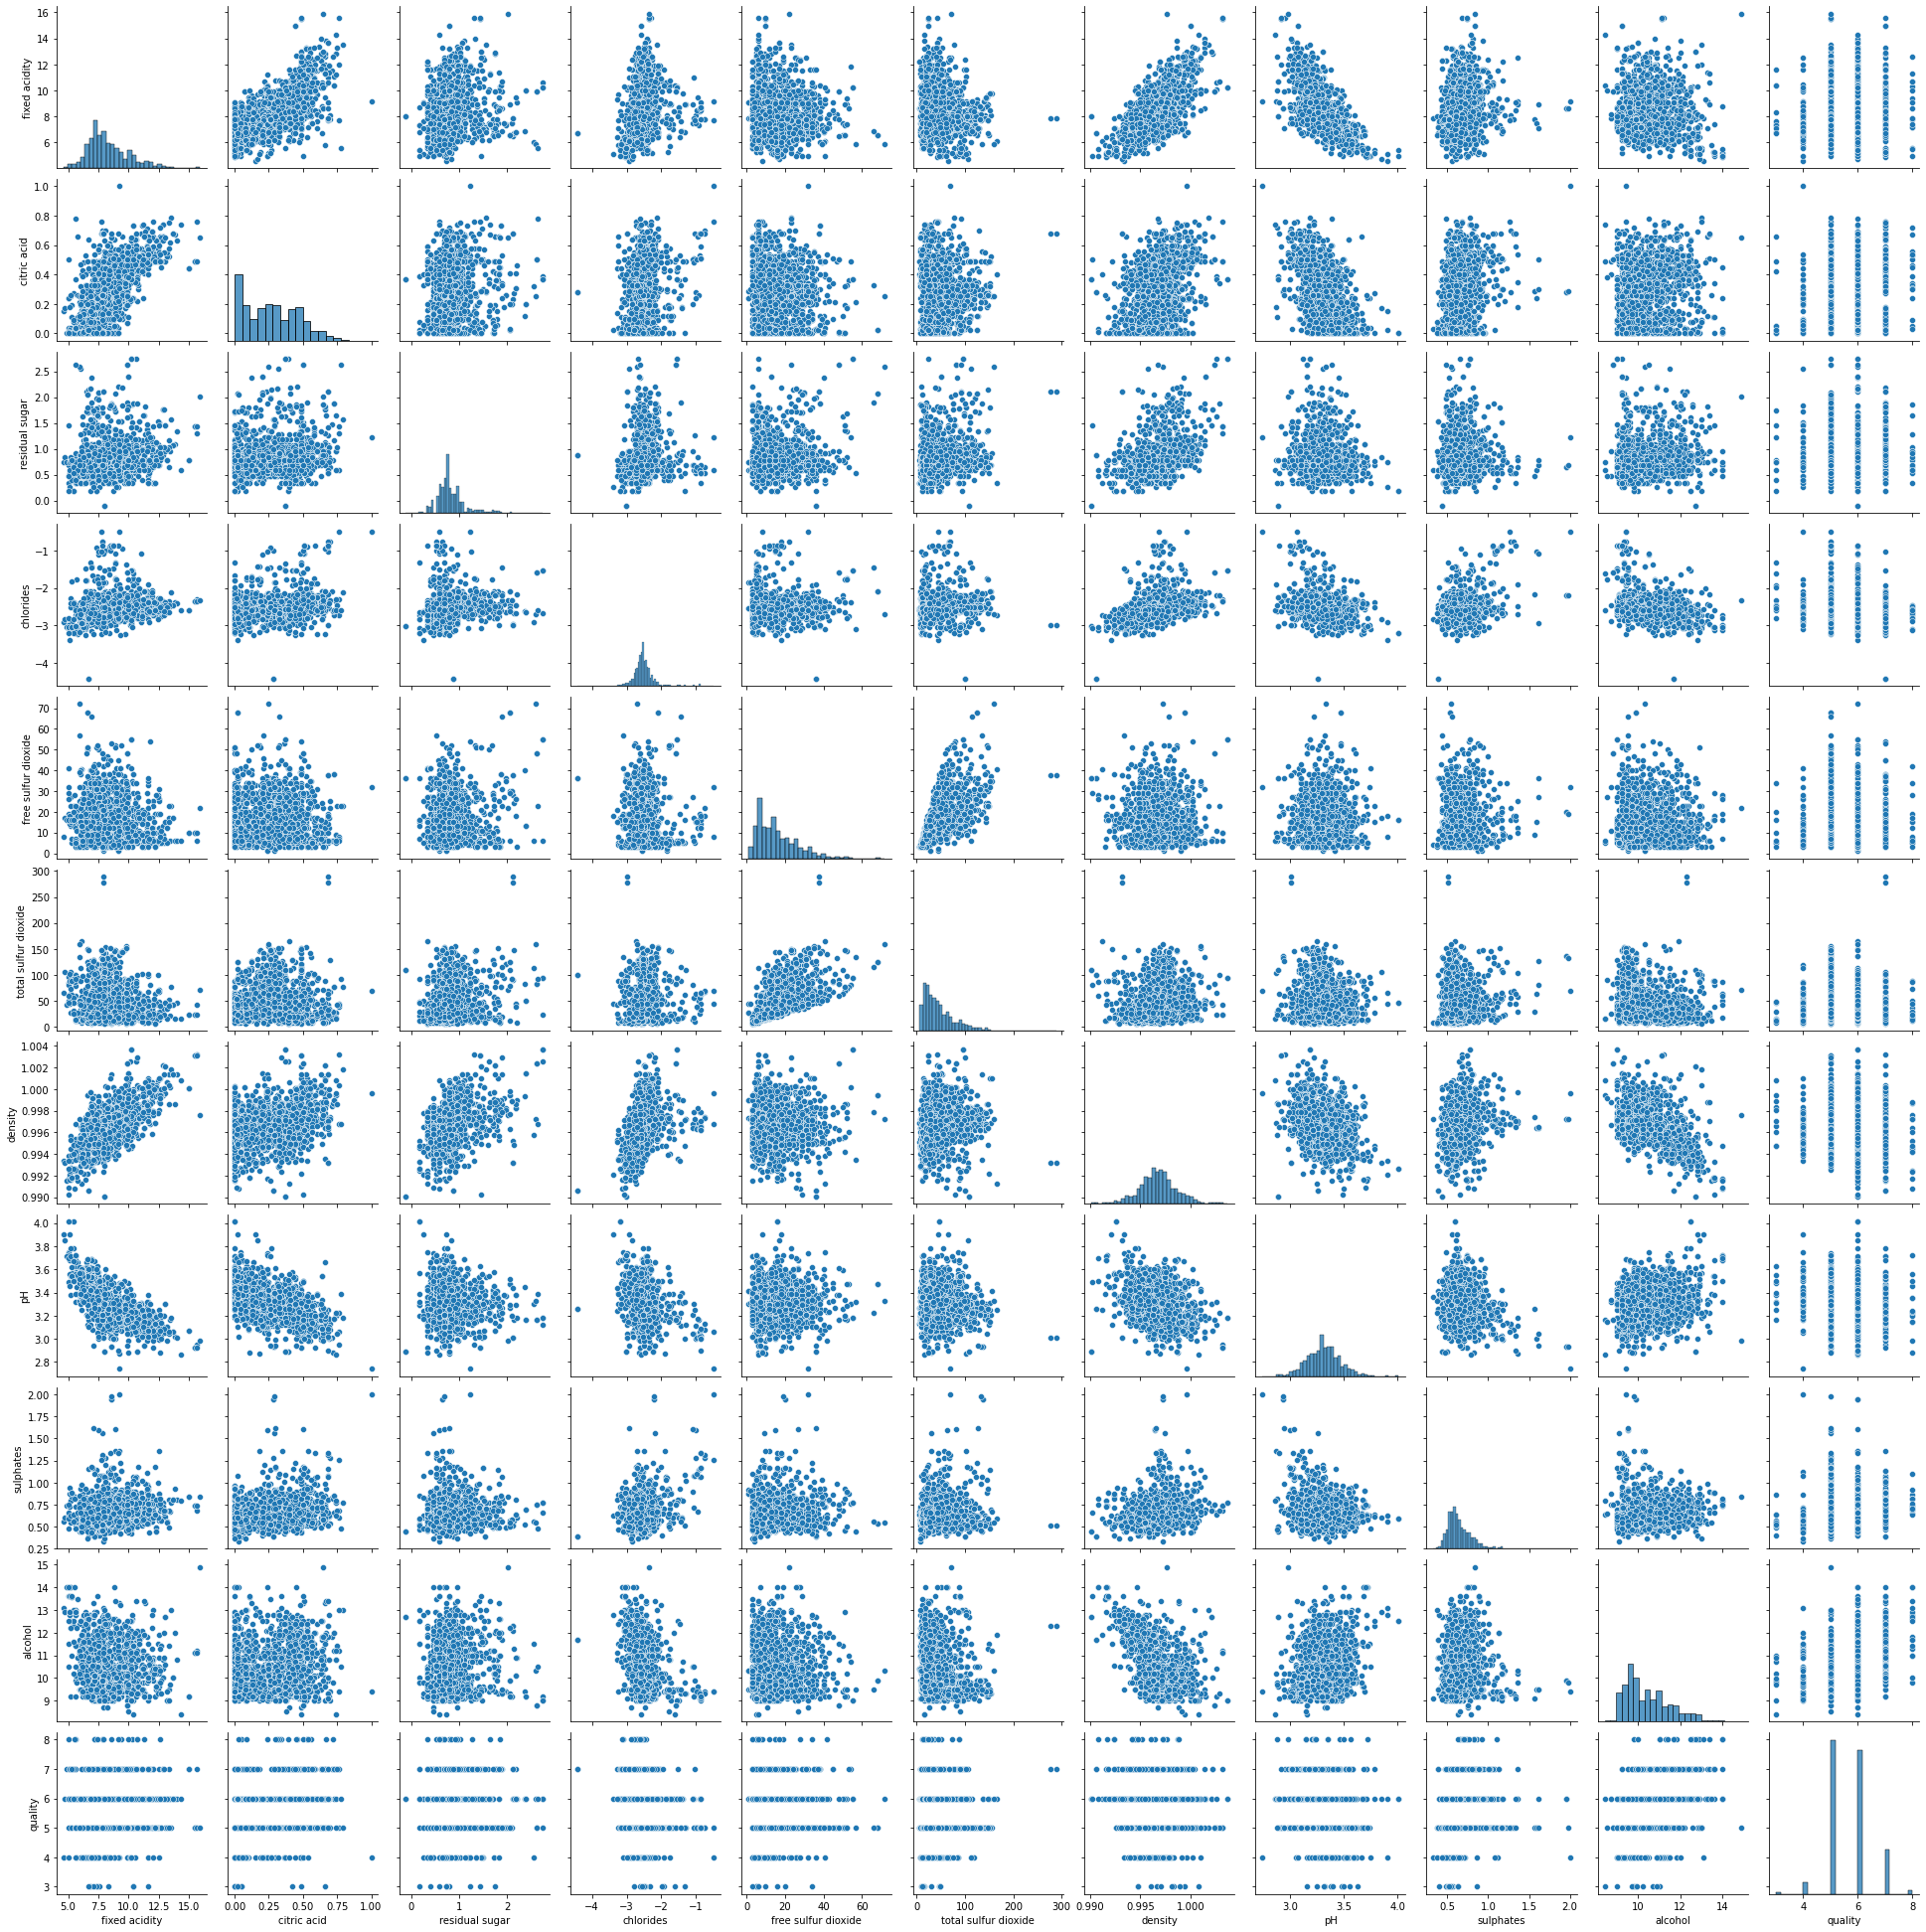

In [121]:
sns.pairplot(df)

<AxesSubplot:>

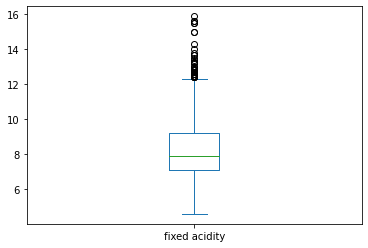

In [122]:
df['fixed acidity'].plot.box()

<AxesSubplot:>

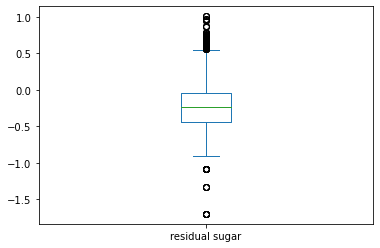

In [77]:
df['residual sugar'].plot.box()

fixed acidity              AxesSubplot(0.125,0.536818;0.0731132x0.343182)
citric acid             AxesSubplot(0.212736,0.536818;0.0731132x0.343182)
residual sugar          AxesSubplot(0.300472,0.536818;0.0731132x0.343182)
chlorides               AxesSubplot(0.388208,0.536818;0.0731132x0.343182)
free sulfur dioxide     AxesSubplot(0.475943,0.536818;0.0731132x0.343182)
total sulfur dioxide    AxesSubplot(0.563679,0.536818;0.0731132x0.343182)
density                 AxesSubplot(0.651415,0.536818;0.0731132x0.343182)
pH                      AxesSubplot(0.739151,0.536818;0.0731132x0.343182)
sulphates               AxesSubplot(0.826887,0.536818;0.0731132x0.343182)
alcohol                       AxesSubplot(0.125,0.125;0.0731132x0.343182)
quality                    AxesSubplot(0.212736,0.125;0.0731132x0.343182)
dtype: object

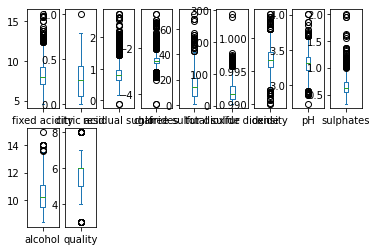

In [123]:
df.plot(kind='box',subplots=True,layout=(2,9))

In [128]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,0.641854,-2.577022,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.00,0.955511,-2.322788,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.04,0.832909,-2.385967,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.56,0.641854,-2.590267,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.00,0.641854,-2.577022,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,0.693147,-2.407946,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.10,0.788457,-2.780621,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.13,0.832909,-2.577022,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.12,0.693147,-2.590267,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [127]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   42,   43,   45,
         57,   81,   81,   83,   86,   88,   91,   92,   95,  106,  106,
        109,  142,  144,  147,  151,  151,  151,  151,  163,  164,  169,
        169,  181,  226,  226,  240,  243,  244,  258,  258,  274,  281,
        291,  324,  325,  339,  340,  347,  354,  374,  381,  391,  396,
        396,  400,  400,  442,  442,  451,  459,  467,  480,  480,  494,
        515,  517,  544,  554,  554,  555,  555,  557,  557,  566,  567,
        568,  584,  588,  591,  595,  608,  614,  636,  639,  649,  649,
        651,  652,  652,  652,  666,  672,  684,  690,  692,  692,  695,
        723,  730,  754,  776,  777,  795,  821,  832,  836,  836,  837,
        837,  889,  899,  911,  917,  923,  925,  926,  982, 1017, 1018,
       1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114,
       1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260,
       1269, 1269, 1270, 1270, 1288, 1289, 1295, 1

In [129]:
df_new=df[(z<3).all(axis=1)]

In [130]:
df_new

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,0.641854,-2.577022,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.00,0.955511,-2.322788,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.04,0.832909,-2.385967,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.56,0.641854,-2.590267,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.00,0.641854,-2.577022,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,0.693147,-2.407946,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.10,0.788457,-2.780621,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.13,0.832909,-2.577022,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.12,0.693147,-2.590267,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [132]:
df.shape

(1599, 11)

In [133]:
df_new.shape

(1455, 11)

In [136]:
x=df_new.drop(['quality'],axis=1)
x

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.00,0.641854,-2.577022,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.00,0.955511,-2.322788,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.04,0.832909,-2.385967,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.56,0.641854,-2.590267,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.00,0.641854,-2.577022,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,0.693147,-2.407946,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.10,0.788457,-2.780621,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.13,0.832909,-2.577022,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.12,0.693147,-2.590267,32.0,44.0,0.99547,3.57,0.71,10.2


In [139]:
x=df_new.iloc[:,0:-1]
x

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.00,0.641854,-2.577022,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.00,0.955511,-2.322788,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.04,0.832909,-2.385967,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.56,0.641854,-2.590267,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.00,0.641854,-2.577022,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,0.693147,-2.407946,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.10,0.788457,-2.780621,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.13,0.832909,-2.577022,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.12,0.693147,-2.590267,32.0,44.0,0.99547,3.57,0.71,10.2


In [141]:
x.shape

(1455, 10)

In [140]:
y=df_new.iloc[:,-1]
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1455, dtype: int64

In [142]:
y.shape

(1455,)

In [143]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=50)

In [144]:
x_train.shape

(974, 10)

In [145]:
y_train.shape

(974,)

In [146]:
x_test.shape

(481, 10)

In [147]:
y_test.shape

(481,)

In [148]:
lr=LinearRegression()

In [149]:
lr.fit(x_train,y_train)

LinearRegression()

In [150]:
lr.coef_

array([-1.53907525e-02,  3.00081463e-01, -2.25183011e-02, -2.56212326e-01,
        6.53309601e-03, -4.35950657e-03, -1.58555781e+01, -7.44056505e-01,
        1.66844640e+00,  2.77593550e-01])

In [151]:
lr.intercept_

19.45447981913366

In [152]:
df.columns

Index(['fixed acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [153]:
lr.score(x_train,y_train)

0.3634180427662336

In [154]:
pred=lr.predict(x_test)
print("predicted quality:",pred)
print("actual quality:",y_test)

predicted quality: [5.64099193 6.27986548 5.82066503 5.08179764 5.93589434 5.42836855
 5.7104987  5.70401685 5.65383428 5.64997928 5.65428189 6.22305848
 5.94678238 5.11857744 6.4550234  6.52198322 6.00904118 5.33766625
 5.0090173  5.25961469 6.25329726 5.21035241 5.20160654 5.05083098
 6.0662804  6.55641842 5.91881575 5.95591291 5.31298797 5.09602234
 5.2184082  5.62955935 5.80292574 6.22813483 5.9087822  5.16604861
 4.83777073 4.8423787  5.59852908 5.50758983 5.73414262 6.45221422
 5.04947798 5.00729272 5.82538186 5.87778782 4.99904957 5.27342493
 5.98765796 6.69077391 5.86881847 5.42285625 5.88545654 5.08299148
 6.12464249 6.20848403 5.60290285 5.75223165 5.2947106  5.05072179
 5.09295736 5.64927671 5.56961454 5.35018012 4.97997629 5.38900769
 5.38267096 4.99826172 5.03121712 5.68579938 5.20245741 5.54754822
 5.02509348 5.15262427 5.98838225 6.52047856 5.22745397 5.3554385
 5.70744575 6.1421863  5.22754226 6.70354234 5.63046766 5.61926599
 5.33768775 5.49092545 5.10455614 6.01826748

In [155]:
print('error:')
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('root mean squarred error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 0.4901672598057739
mean squared error: 0.39446320108795174
root mean squarred error: 0.6280630550254901


In [156]:
df=pd.DataFrame(pred)
df.to_csv('red wine quality.csv')